<b>Time Series Analysis on S&P 500 Stock Market</b>
<p>The S&P 500 is a stock market index that measures the stock performance of the 500 large companies listed on stock exchange in the United States </p>

1. Import all Dependancy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

In [3]:
glob.glob(r'C:\Users\Neeraj\Desktop\Project\S&P 500 Stock Market Case Study\DataSet\individual_stocks_5yr\*csv')

['C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 50

In [ ]:
company_list = [  
 r'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\AAPL_data.csv',
 r'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\AMZN_data.csv',
 r'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\GOOG_data.csv',
 r'C:\\Users\\Neeraj\\Desktop\\Project\\S&P 500 Stock Market Case Study\\DataSet\\individual_stocks_5yr\\MSFT_data.csv',
]

In [5]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([current_df, all_data], ignore_index=True)

In [6]:
all_data.shape

(4752, 7)

In [7]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


2. <b>What was the change in price of the stock overtime</b><br>
<ul>
<li>Visualized the changes with a line plot</li>
</ul>

In [8]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [9]:
all_data['date'] = pd.to_datetime(all_data['date'])
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [10]:
tech_list = all_data['Name'].unique()
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

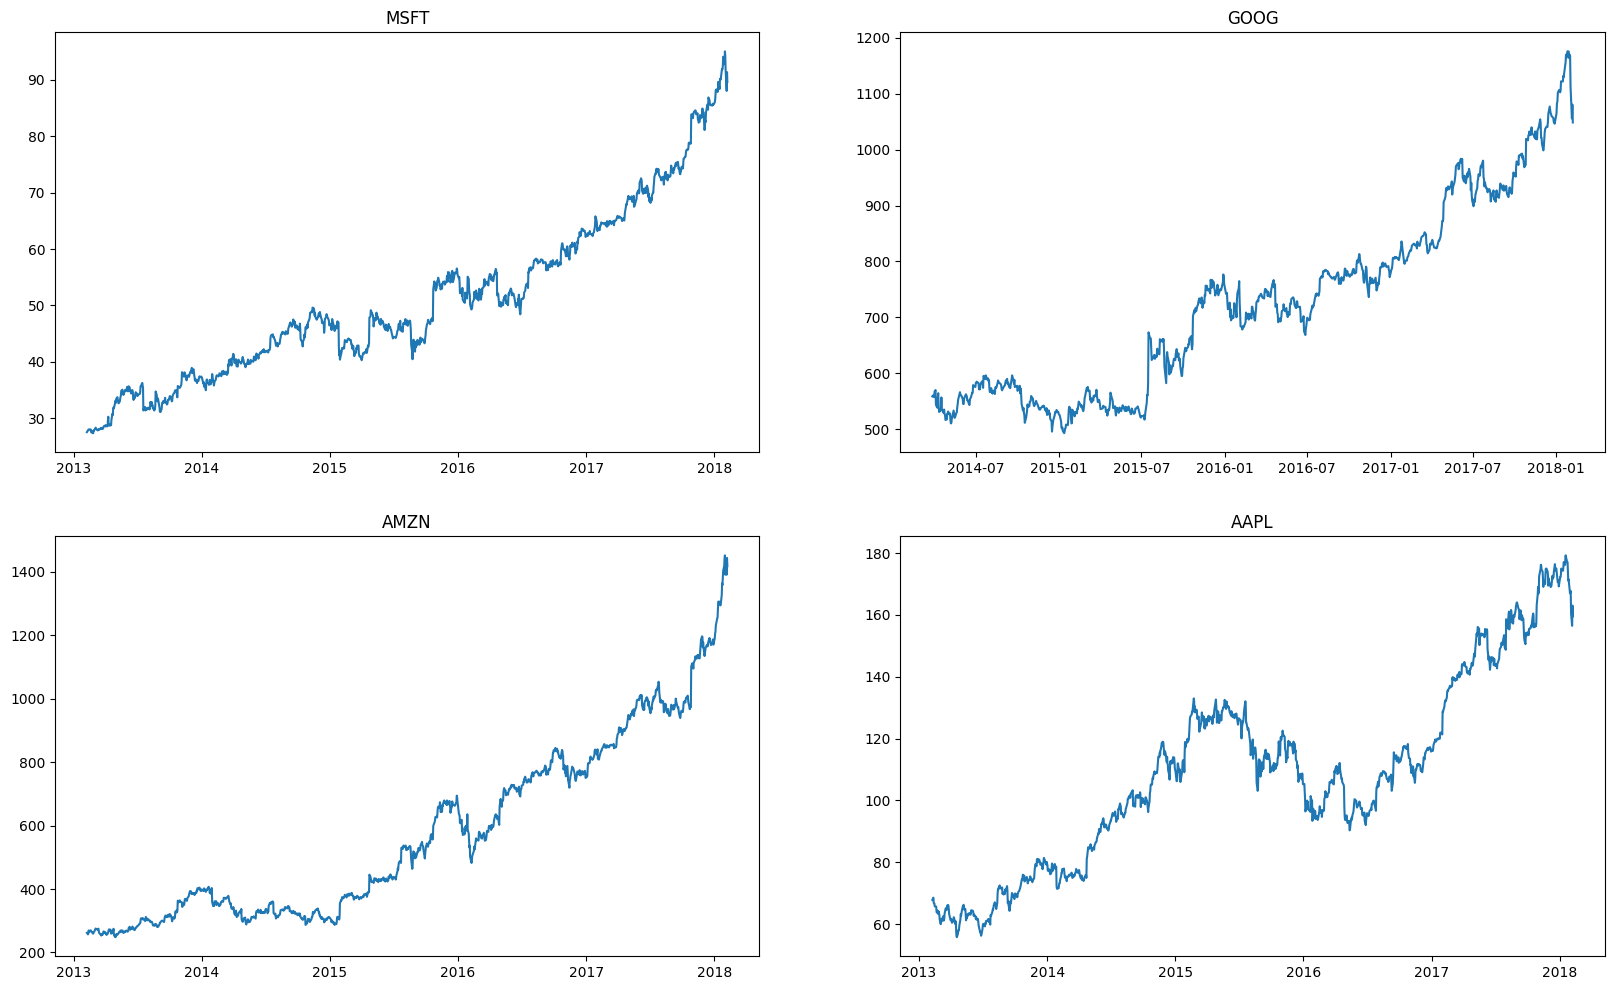

In [11]:
plt.figure(figsize=(20,12))
for idx in range(len(tech_list)):
    company = tech_list[idx]
    
    plt.subplot(2,2, idx+1)
    filter = all_data['Name'] == company
    df = all_data[filter]
    plt.plot(df['date'], df['close'])
    plt.title(company)
    

3. <b>What was the moving average of moving stocks</b><br>
<ol>
<li>Based on the closing stocks, calculated rolling mean with window 10, 20 & 50</li>
<li>Ploted the line graph based on calculated rolling mean</li>
</ol>

In [12]:
new_data = all_data.copy()

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [14]:
new_data.tail(5)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4747,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [15]:
new_data.set_index('date', inplace = True)

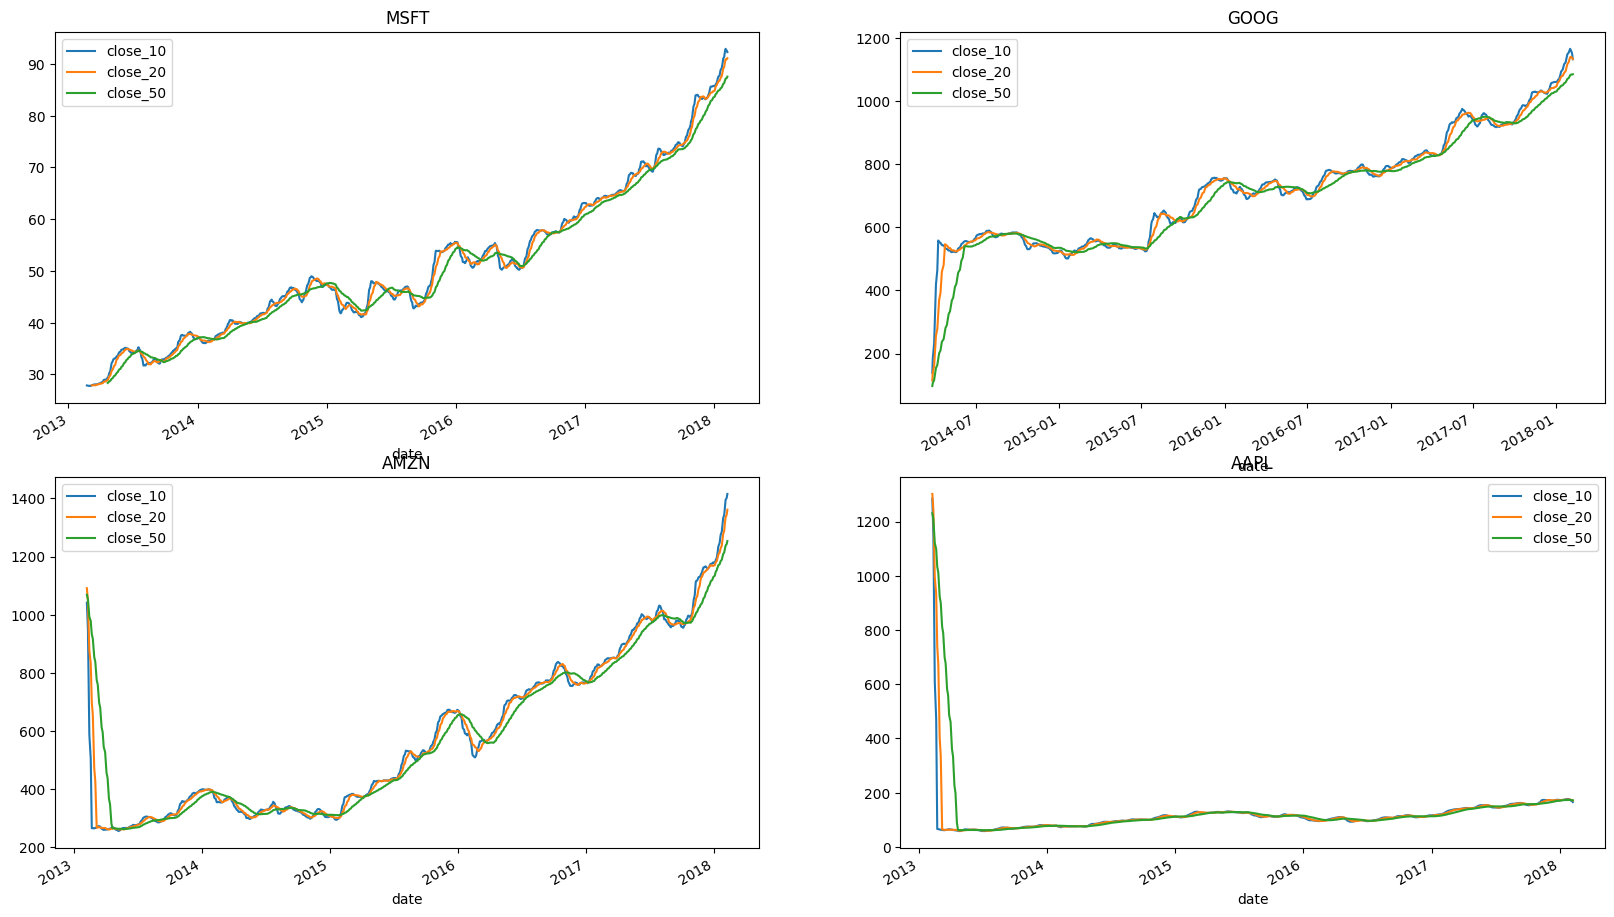

In [16]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):    
    plt.subplot(2,2, index)
    filter = new_data['Name'] == company
    df = new_data[filter]
    df[['close_10', 'close_20', 'close_50']].plot(ax = plt.gca())
    plt.title(company)

4. <b>Analyse Closing price change in apple stock</b>

In [17]:
apple = pd.read_csv(r'C:\\\\Users\\\\Neeraj\\\\Desktop\\\\Project\\\\S&P 500 Stock Market Case Study\\\\DataSet\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [18]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [19]:
# calculate percentage change of current and next element
apple['close'].pct_change()*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

In [20]:
apple['Daily return(in %)'] = apple['close'].pct_change()*100

In [21]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [22]:
import plotly.express as px

In [23]:
px.line(apple, x='date', y='Daily return(in %)')

5. <b>Performing resampling analysis of closing price</b><br>
resampling means at what percent the change is happened between the current and the next value.
<ol>
<li>Convert the 'date' data type to datetime data type which will help in resampling based on month, year, quater</li>
<li>Visualized these resampling with line plot</li>
</ol>

In [24]:
apple['date'] = pd.to_datetime(apple['date'])

In [25]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


In [26]:
apple.set_index('date', inplace = True)

In [27]:
apple['close'].resample('M').mean()

C:\Users\Neeraj\AppData\Local\Temp\ipykernel_10268\567018292.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

C:\Users\Neeraj\AppData\Local\Temp\ipykernel_10268\3929892990.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='date'>

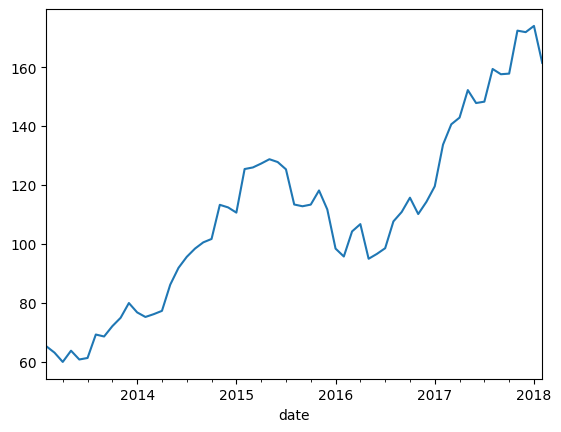

In [28]:
apple['close'].resample('M').mean().plot()

C:\Users\Neeraj\AppData\Local\Temp\ipykernel_10268\522943284.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Axes: xlabel='date'>

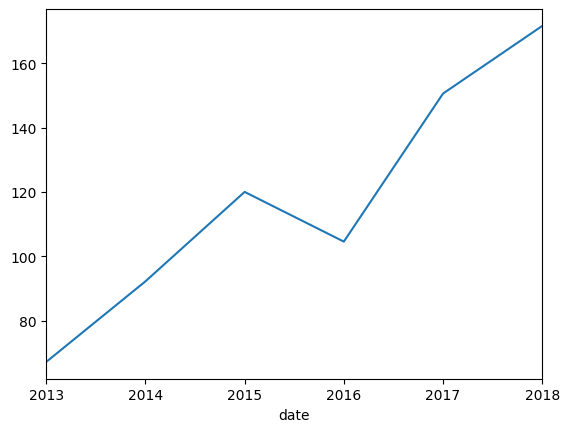

In [29]:
apple['close'].resample('Y').mean().plot()

6. <b>Checking if the closing price of these teach companies(Amazon, apple, google, microsoft) are correlated or not!</b>
<ol>
<li>Created pairplot: telling the correlation between each company</li>
<li>also used heat map for correlation vasualization</li>
</ol>

In [30]:
closing_price = pd.DataFrame()

closing_price['apple_close'] = pd.read_csv(company_list[0])['close']
closing_price['amzn_close'] = pd.read_csv(company_list[1])['close']
closing_price['goog_close'] = pd.read_csv(company_list[2])['close']
closing_price['msft_close'] = pd.read_csv(company_list[3])['close']

In [31]:
closing_price.head()

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


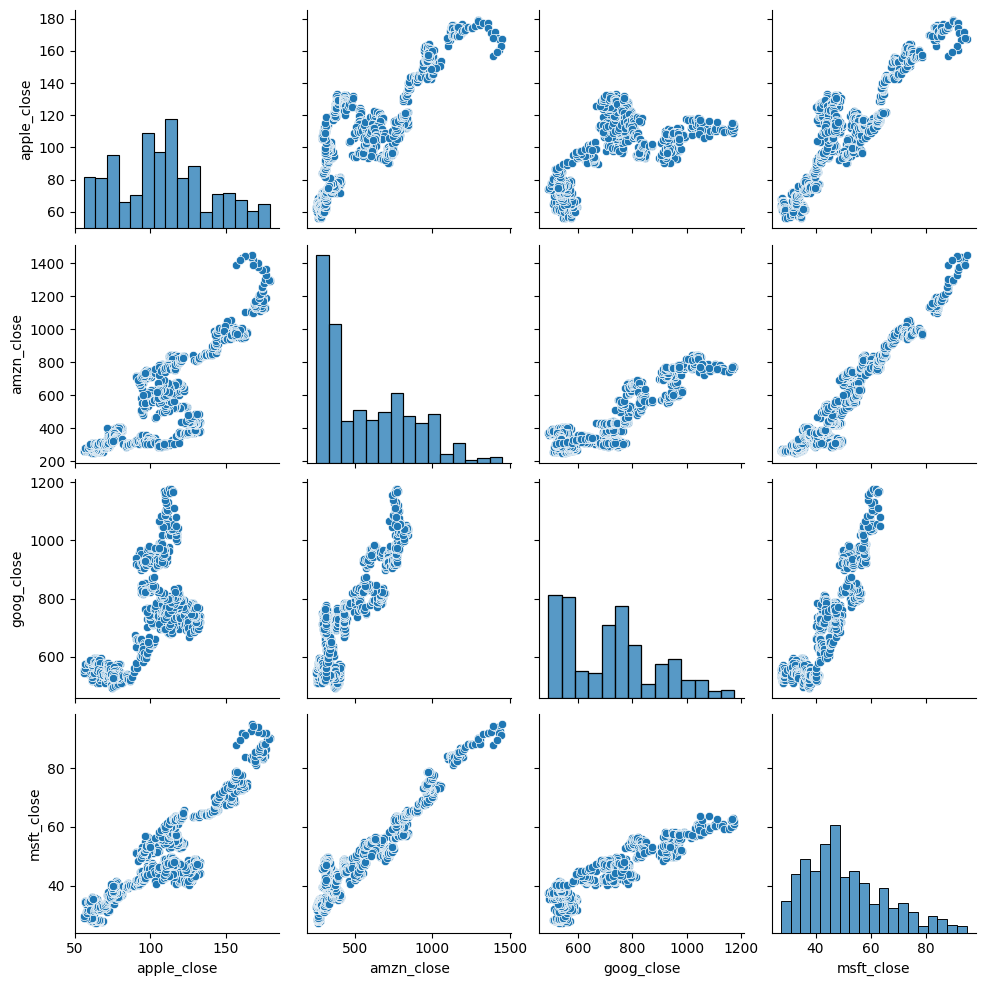

In [32]:
sns.pairplot(closing_price)

<Axes: >

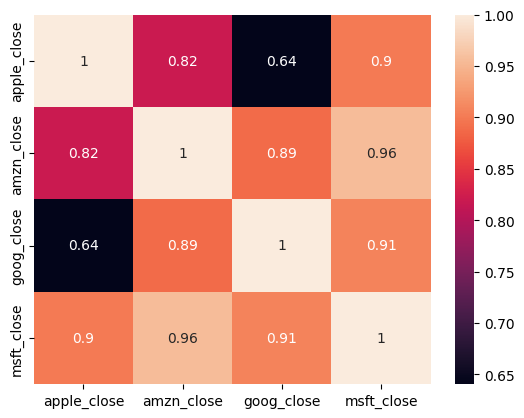

In [33]:
sns.heatmap(closing_price.corr(), annot = True)

7. <b>analyse whether Daily change in closing price of stocks or daily returns in stock are co-related or not</b>

In [34]:
closing_price.head()

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


In [35]:
# alternative of calculating percentage change of current and next element
# formula (x-y)/y * 100  , where y is next value
# i.e. (without shift - with shift) / with shift * 100
(closing_price['apple_close'] - closing_price['apple_close'].shift(1)) / closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [37]:
# for all companies

for col in closing_price.columns:
    closing_price[col+'_pct_change'] = (closing_price[col] - closing_price[col].shift(1)) / closing_price[col].shift(1) * 100

In [39]:
closing_price.head()

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676


In [40]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [41]:
closing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [42]:
closing_p.head()

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676


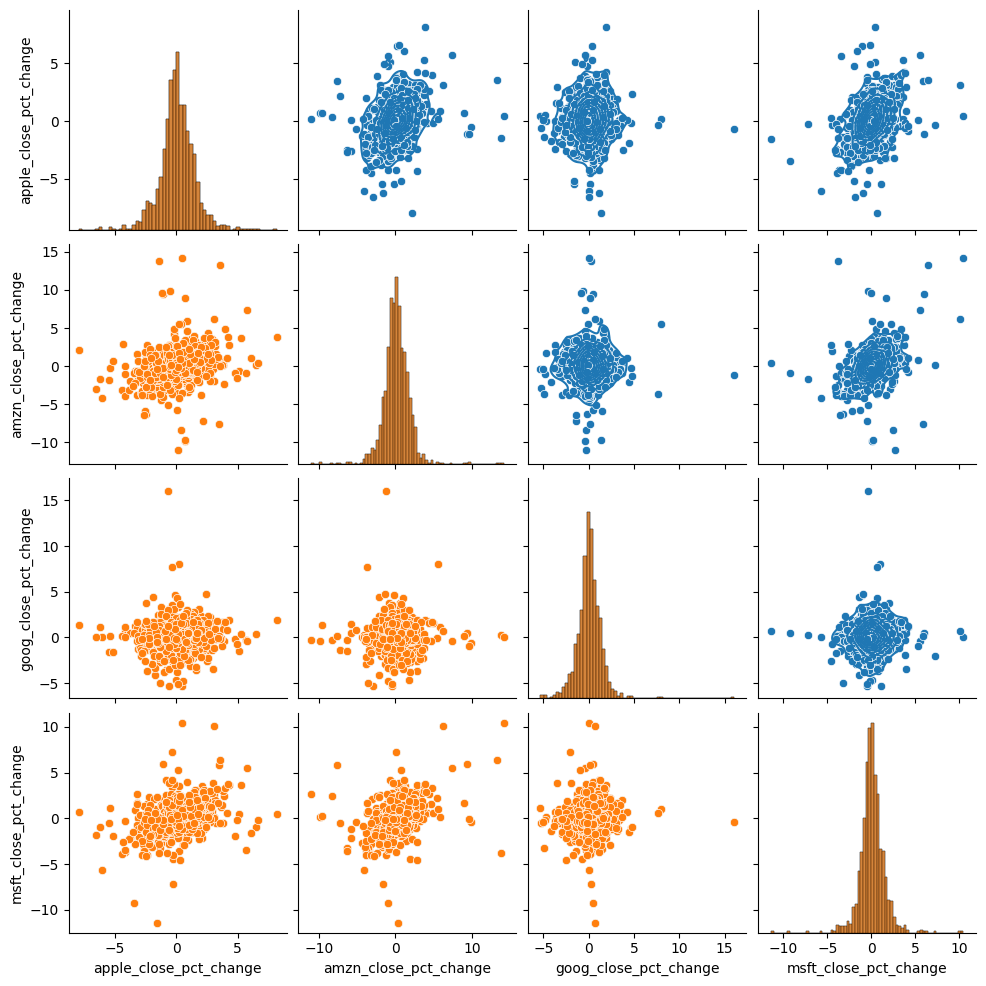

In [44]:
g = sns.pairplot(data = closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)